In [45]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
import seaborn as sns
colors = sns.color_palette()

import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot, draw_collections
from pandapower.plotting import create_bus_collection
from pandapower.plotting import create_line_collection
from pandapower.plotting import create_trafo_collection

In [46]:
net118 = pn.case118()
buses = np.arange(1, 119)

In [65]:
zone1_buses = pd.read_csv('./zone1_bus.csv', header=None, index_col=None).to_numpy().flatten() - 1
zone2_buses = pd.read_csv('./zone2_bus.csv', header=None, index_col=None).to_numpy().flatten() - 1
zone3_buses = pd.read_csv('./zone3_bus.csv', header=None, index_col=None).to_numpy().flatten() - 1

#### Select buses in each zone

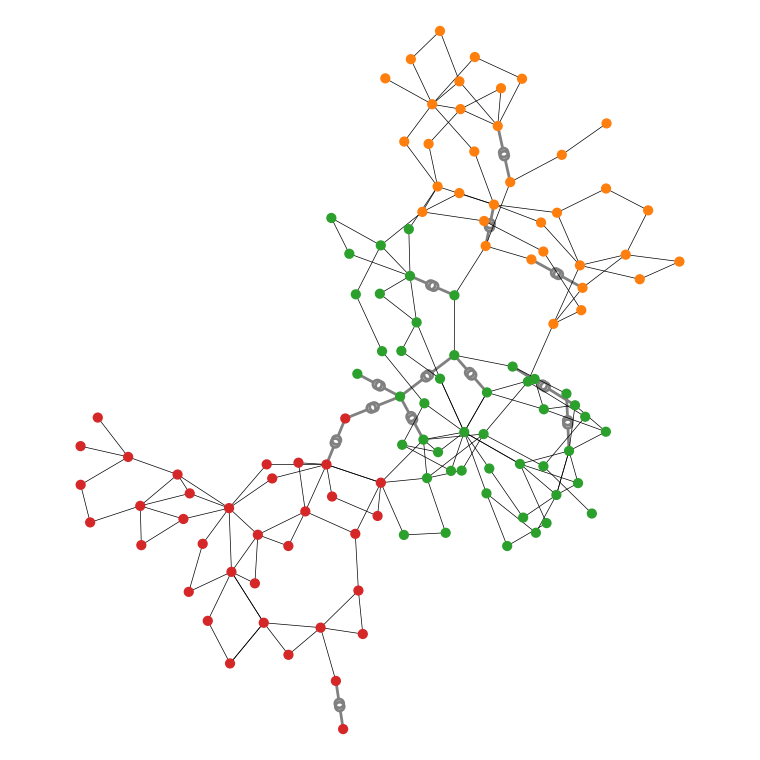

In [67]:
# Create bus collections
####### The bus no. is not monotonically increasing when plot buses, so Boolean index cannot be applied ###########
zone1_bc = create_bus_collection(net118, buses=zone1_buses, color=colors[1], size=0.1)
zone2_bc = create_bus_collection(net118, buses=zone2_buses, color=colors[2], size=0.1)
zone3_bc = create_bus_collection(net118, buses=zone3_buses, color=colors[3], size=0.1)

# Create line collection
lc = create_line_collection(net118, color='black', linewidth=0.5, zorder=-100)

# Create trafo collection
tc = create_trafo_collection(net118, color='gray', size=0.1, zorder=-200)

zone_list = [zone1_bc, zone2_bc, zone3_bc, lc, tc]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
draw_collections(zone_list, ax=ax)
fig.savefig('Case118.pdf')

plt.tight_layout()
plt.show()
plt.close('all')